In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import plot
from matplotlib import pyplot as plt
from feature_engine.encoding import OneHotEncoder
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('../../case data/hose-price-prediction/train.csv',index_col='Id',usecols=['Id','LotArea','SalePrice','HouseStyle'])
data

,LotArea,HouseStyle,SalePrice
Id,,,
1,8450,2Story,208500
2,9600,1Story,181500
3,11250,2Story,223500
4,9550,2Story,140000
5,14260,2Story,250000
...,...,...,...
1456,7917,2Story,175000
1457,13175,1Story,210000
1458,9042,2Story,266500


In [8]:
data.isna().sum()

LotArea       0
HouseStyle    0
SalePrice     0
dtype: int64

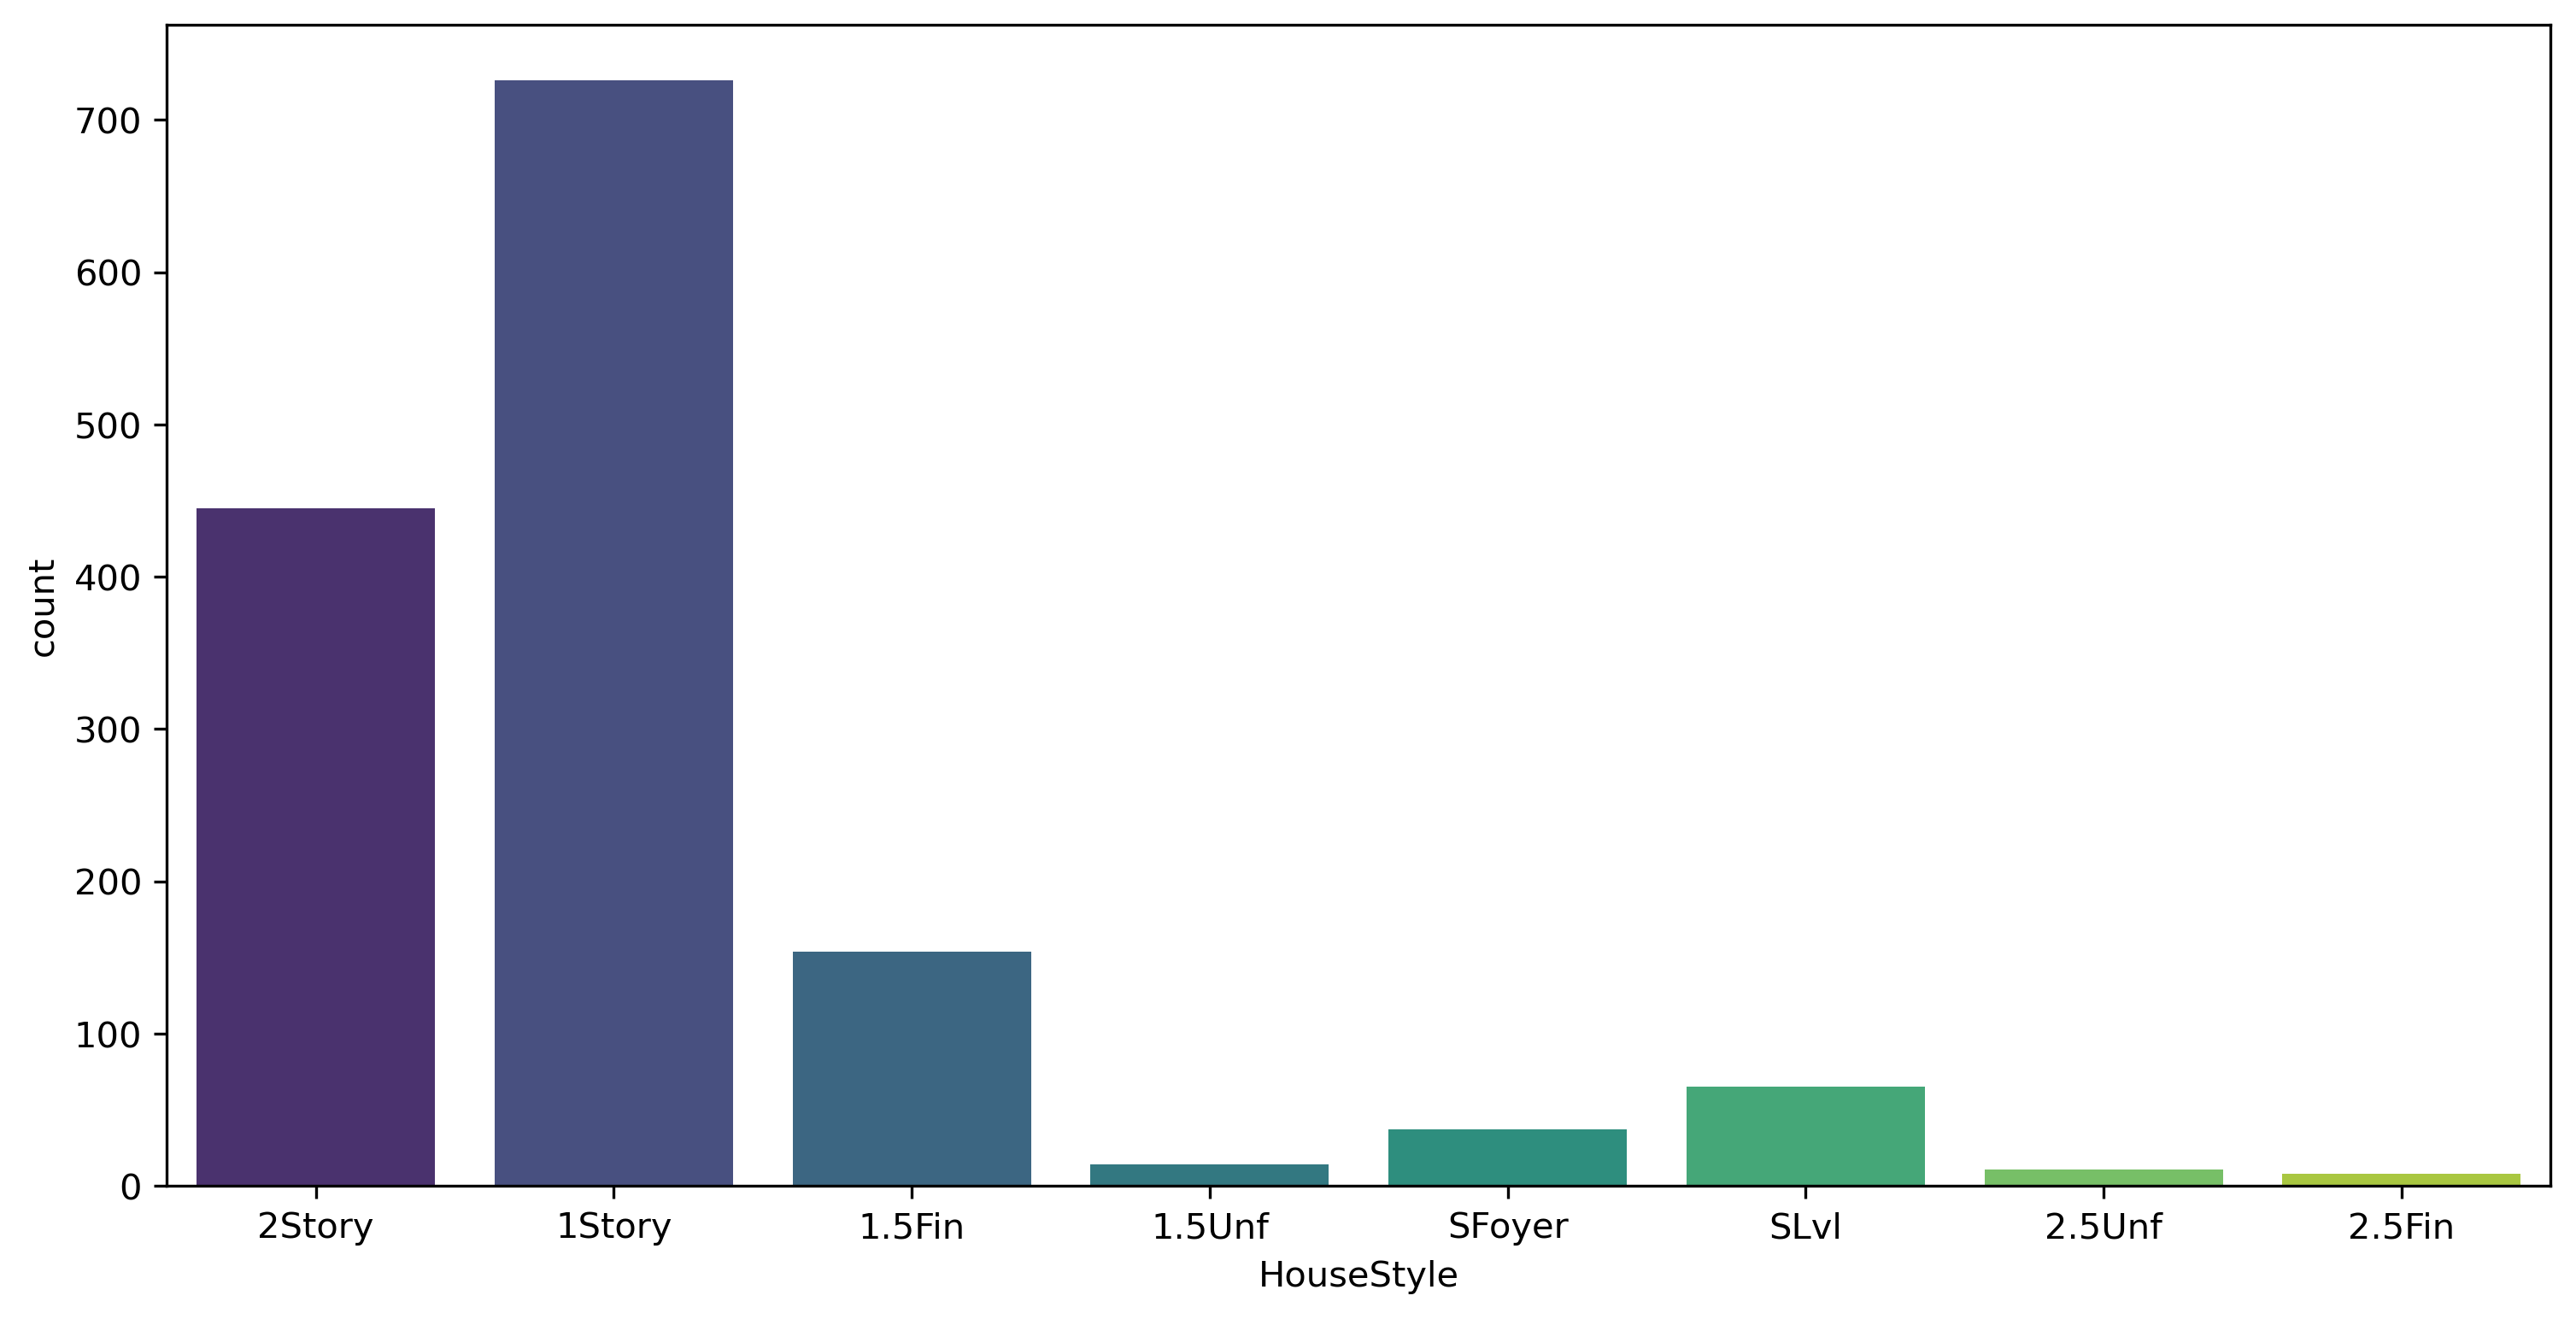

In [9]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=data.HouseStyle,palette='viridis')
plt.show()

In [20]:
from regression import MultiClassLogisticRegression

def minmax_normalizer(dataframe):
    norm_data = pd.DataFrame()
    for col in dataframe:
        col_min = np.min(dataframe[col])
        col_max = np.max(dataframe[col])
        norm_data[col] = (dataframe[col] - col_min)/(col_max - col_min)

    return norm_data

x = minmax_normalizer(data[['LotArea','SalePrice']])
model = MultiClassLogisticRegression()
model.fit(x,data[['HouseStyle']],0.6,10000)

array([[-3.35552567,  0.68367727,  3.8761641 , -0.672342  , -1.22696458,
         0.62187424, -0.1968063 ,  0.26992294],
       [ 6.98260802,  2.91851591, -4.7666321 , -3.6612507 , -3.72518284,
         0.82345288, -0.52286362,  1.95135246],
       [ 0.79885219,  1.99475427,  1.61551891, -0.77964744,  0.22762944,
        -0.02366969, -1.53462624, -2.29881145]])

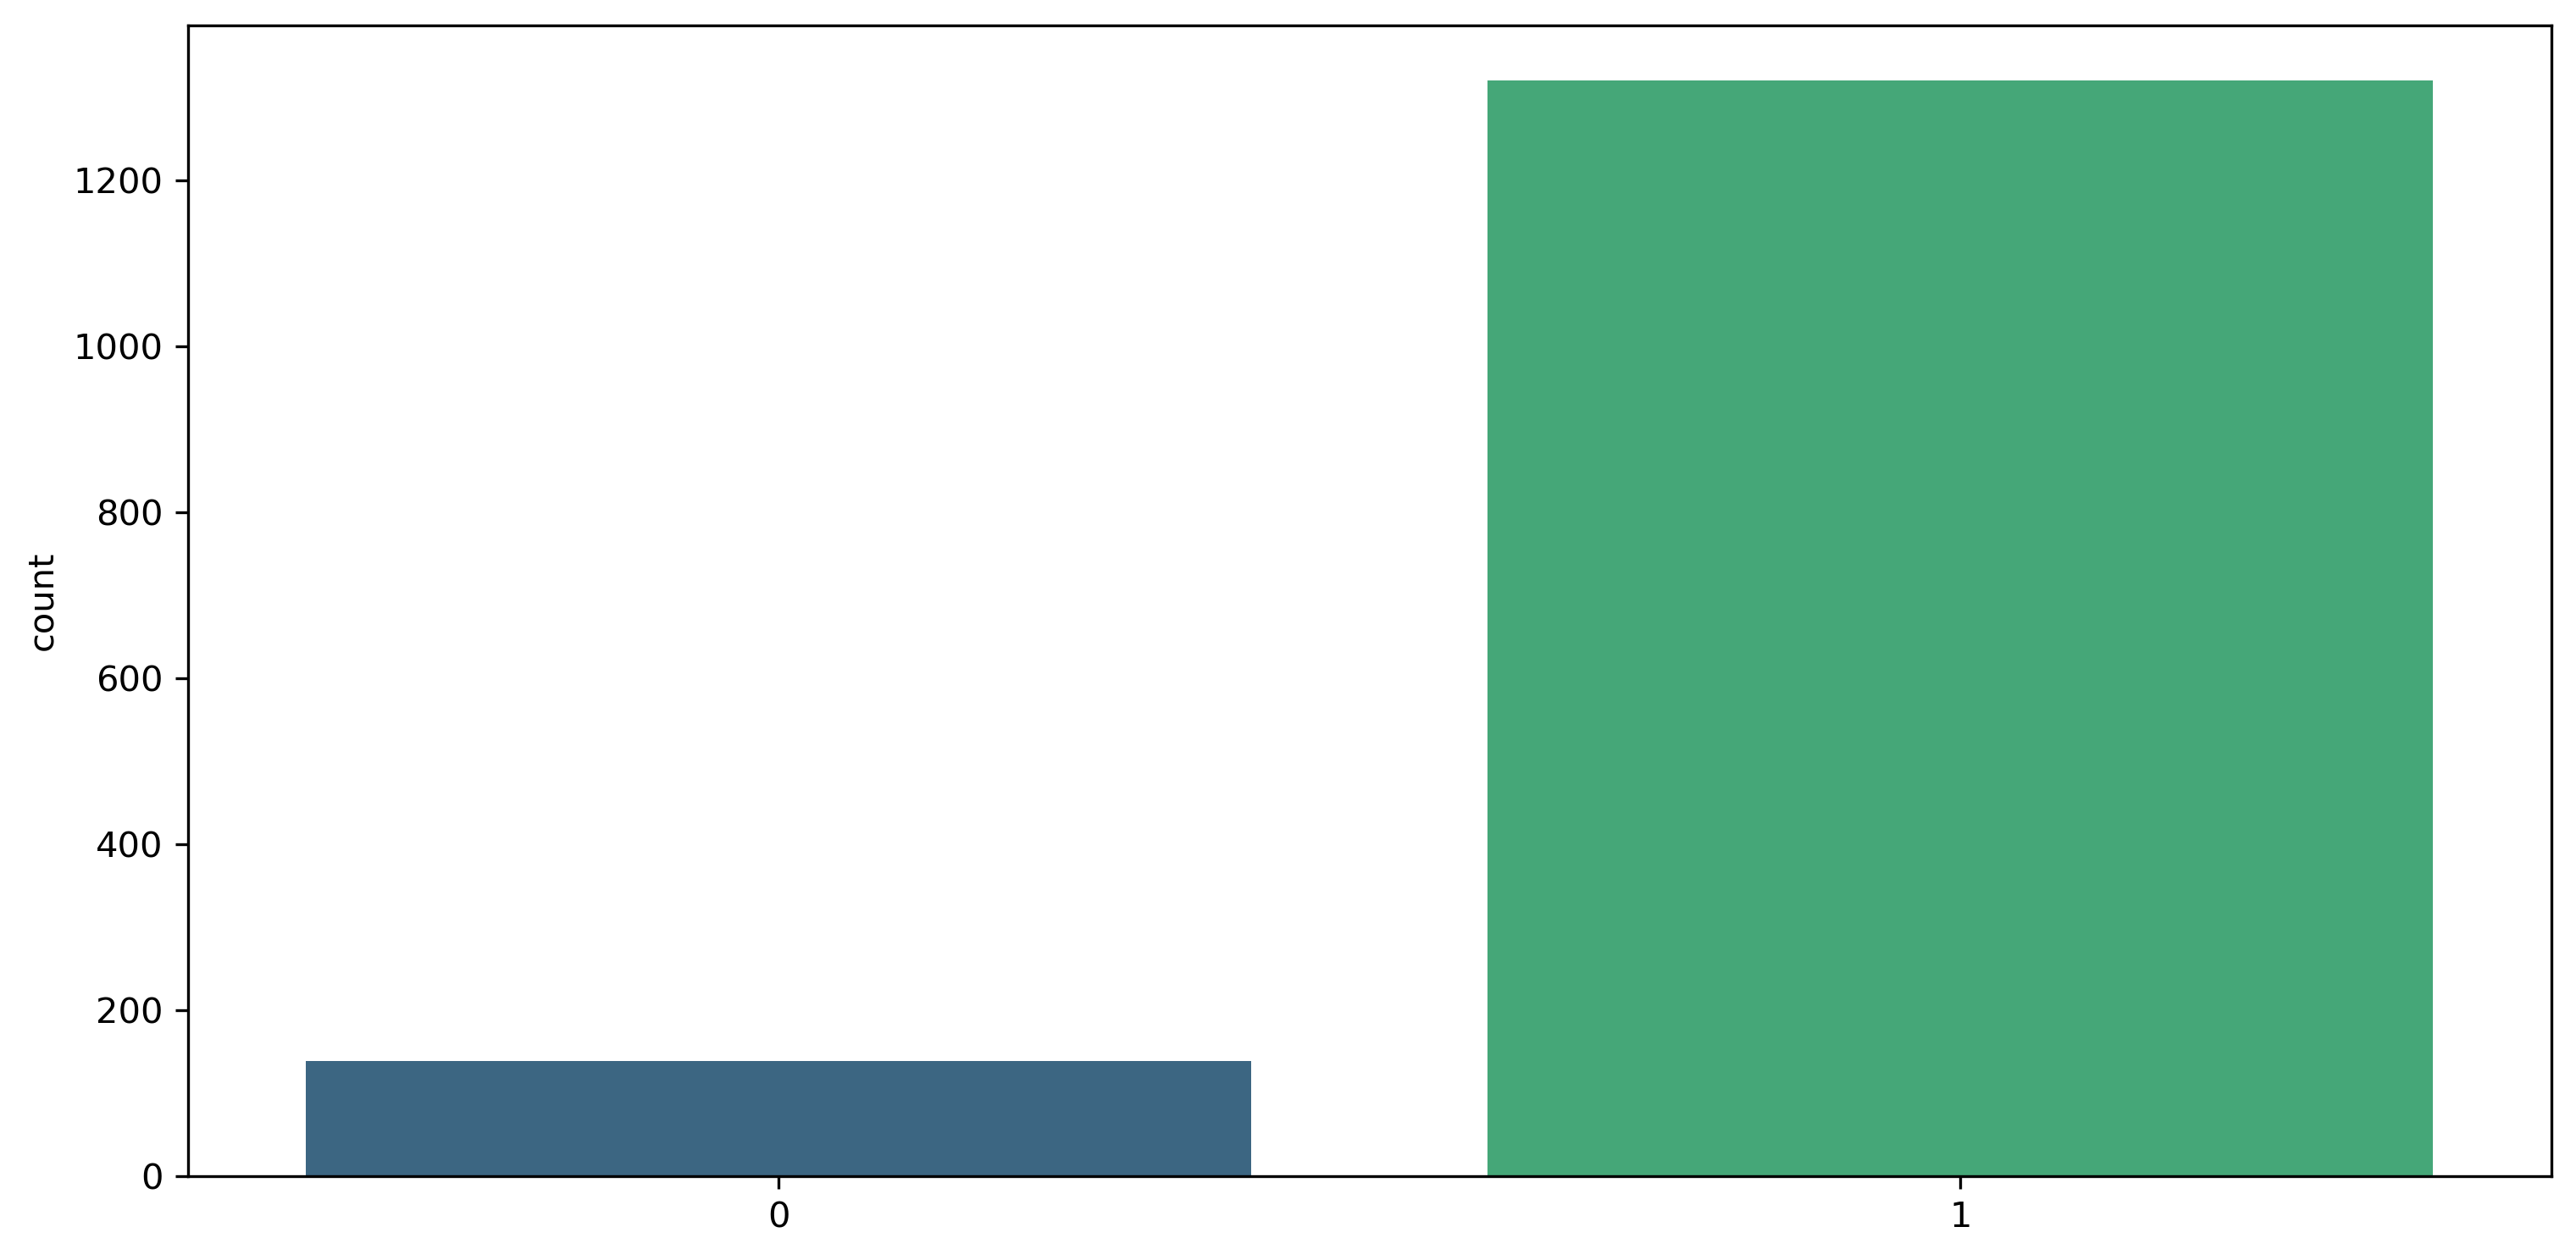

In [21]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=model.predict(x),palette='viridis')
plt.show()

In [25]:
fig = px.scatter_3d(data,
                    x='LotArea',
                    y='SalePrice',
                    z='HouseStyle',
                    color='SalePrice',
                    opacity=0.8)
plot(fig)

'temp-plot.html'

In [26]:
fig = px.scatter_3d(data,
                    x='LotArea',
                    y='SalePrice',
                    z=model.predict(x),
                    color='SalePrice',
                    opacity=0.8)
plot(fig)

'temp-plot.html'